# Data from the web

In [482]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import seaborn
%matplotlib inline

import selenium
import time

In [62]:
URLs = ["https://www.topuniversities.com/university-rankings/world-university-rankings/2018", "https://www.timeshighereducation.com/world-university-rankings/2018/world-ranking"]

### Times Higher Education University Ranking

In [449]:
gecko_driver_path = r'C:\Users\Emily\Documents\Informatique\Web\geckodriver-v0.19.0-win64\geckodriver.exe'
url = 'https://www.timeshighereducation.com/world-university-rankings/2018/world-ranking#!/page/0/length/-1/sort_by/rank/sort_order/asc/cols/stats'

driver = selenium.webdriver.Firefox(executable_path=gecko_driver_path)
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5) # wait for the page to load

page_source = driver.page_source

In [450]:
soup = BeautifulSoup(page_source, 'html.parser')
table = soup.find('table', id='datatable-1')
entries = table.find_all('tr')

In [451]:
university_names = [entry.text.strip() for entry in soup.findAll("a", { "class" : "ranking-institution-title" })]
university_ranks = [entry.text.strip().split('=')[-1] for entry in soup.findAll("td", { "class" : "rank sorting_1 sorting_2" })]
fte_students = [entry.text.strip() for entry in soup.findAll("td", { "class" : " stats stats_number_students" })]
students_staff_ratio = [entry.text.strip() for entry in soup.findAll("td", { "class" : " stats stats_student_staff_ratio" })]
international_students = [entry.text.strip() for entry in soup.findAll("td", { "class" : " stats stats_pc_intl_students" })]
female_male_ratio = [entry.text.strip() for entry in soup.findAll("td", { "class" : " stats stats_female_male_ratio" })]

In [452]:
data = pd.DataFrame()
data['Name'] = university_names
data['Rank'] = university_ranks
data['No. of FTE Students'] = fte_students
data['Students:Staff Ratio'] = students_staff_ratio
data['International Students'] = international_students
data['Female:Male Ratio'] = female_male_ratio
data.head()

,Name,Rank,No. of FTE Students,Students:Staff Ratio,International Students,Female:Male Ratio
0,University of Oxford,1,"20,409",11.2,38%,46 : 54
1,University of Cambridge,2,"18,389",10.9,35%,45 : 55
2,California Institute of Technology,3,"2,209",6.5,27%,31 : 69
3,Stanford University,3,"15,845",7.5,22%,42 : 58
4,Massachusetts Institute of Technology,5,"11,177",8.7,34%,37 : 63


### 200 top universities

In [461]:
#TODO: fix the warning (?)
top_200 = data.head(200)
top_200.loc[:, 'International Students'] = top_200['International Students'].apply(lambda x: int(x.split('%')[0]) / 100)
top_200.loc[:, 'Students:Staff Ratio'] = top_200['Students:Staff Ratio'].apply(lambda x: float(x))

C:\Users\Emily\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Emily\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [462]:
top_international_students = top_200.sort_values('International Students', ascending=False)
top_international_students.head()

,Name,Rank,No. of FTE Students,Students:Staff Ratio,International Students,Female:Male Ratio
24,London School of Economics and Political Science,25,"10,065",12.2,0.71,52 : 48
178,University of Luxembourg,179,"4,969",14.6,0.57,50 : 50
37,École Polytechnique Fédérale de Lausanne,38,"9,928",11.2,0.55,28 : 72
7,Imperial College London,8,"15,857",11.4,0.55,37 : 63
102,Maastricht University,103,"16,727",18.0,0.50,58 : 42


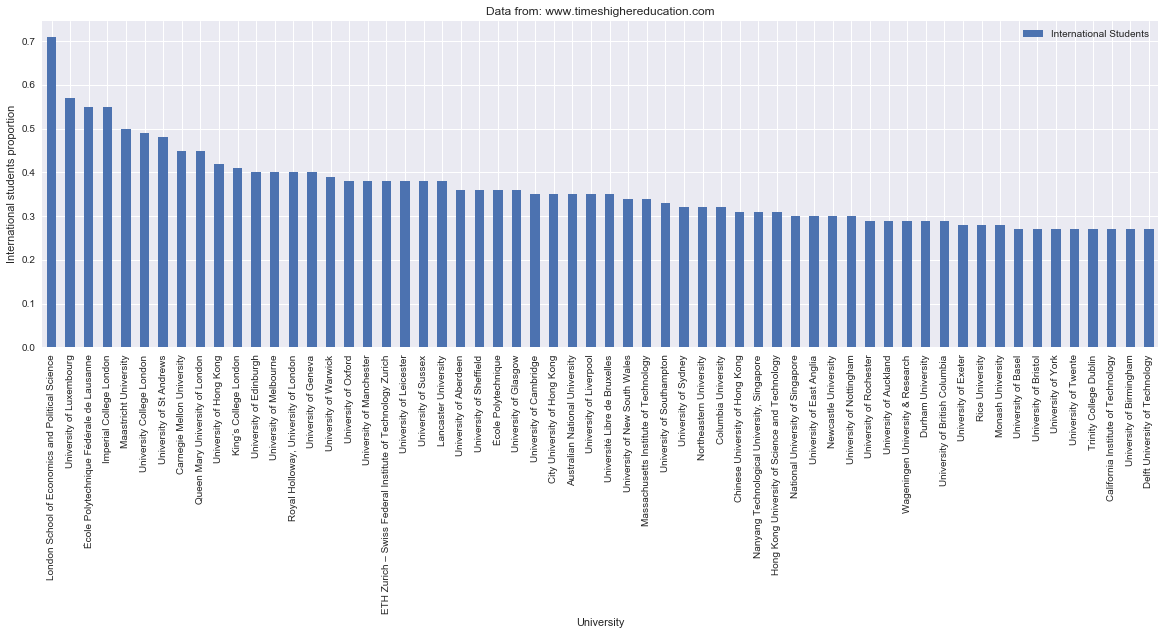

In [481]:
ax = top_international_students.head(60).plot(y='International Students', x='Name', kind='bar', grid=True, figsize=(20, 6), title='Data from: ' + URLs[1])
ax.set_xlabel('University')
ax.set_ylabel('International students proportion')

In [464]:
top_student_staff_ratio = top_200.sort_values('Students:Staff Ratio', ascending=True)
top_student_staff_ratio.head()

,Name,Rank,No. of FTE Students,Students:Staff Ratio,International Students,Female:Male Ratio
105,Vanderbilt University,105,"12,011",3.3,0.13,53 : 47
109,University of Copenhagen,109,"30,395",4.1,0.14,58 : 42
12,Johns Hopkins University,13,"15,498",4.3,0.24,52 : 48
11,Yale University,12,"12,155",4.3,0.21,49 : 51
153,University of Rochester,153,"9,636",4.3,0.29,49 : 51


In [ ]:
#plot
#...

## QS World University Ranking

In [290]:
url = 'https://www.topuniversities.com/university-rankings/world-university-rankings/2018'

driver = webdriver.Firefox(executable_path=gecko_driver_path)
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#driver.find_element_by_class_name('form-control input-sm').click()
time.sleep(5) # wait to load

page_source = driver.page_source

In [293]:
soup = BeautifulSoup(page_source, 'html.parser')
table = soup.find('table', id='qs-rankings')
entries = table.find_all('tr')